**Proyek Akhir**
- **Nama:** Aulia Afifah
- **Email:** auliaafifah2205@gmail.com
- **ID Dicoding:** auliaafifah253



# Data Understanding

Import semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

 baca data dengan menggunakan fungsi pandas.read_csv

In [2]:
df= pd.read_csv('/content/IMDB Top 250 Movies.csv')
df

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Help,2011,8.1,Drama,PG-13,2h 26m,Change begins with a whisper.,25000000,216639112,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett"
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama",G,2h 22m,There is man and beast at nature's mercy. Ther...,4000000,14480,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev"
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy",G,1h 30m,Wish granted! (DVD re-release),Not Available,Not Available,"Scott Weinger,Robin Williams,Linda Larkin,Jona...","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott"
248,249,Gandhi,1982,8.0,"Biography,Drama,History",PG,3h 11m,His Triumph Changed The World Forever.,22000000,52767889,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley


# Univariate Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


Berdasarkan output di atas, dapat mengetahui bahwa file df memiliki 250 entri

In [4]:
print(df.shape)

(250, 13)


 jumlah kolom dan baris pada df

Untuk melihat ada berapa banyak entri yang unik berdasarkan variable-variable yang ada

**Rating Variable**

In [5]:
print('Jumlah data: ', len(df.rating.unique()))
print('Jenis rating: ', df.rating.unique())

Jumlah data:  13
Jenis rating:  [9.3 9.2 9.  8.9 8.8 8.7 8.6 8.5 8.4 8.3 8.2 8.1 8. ]


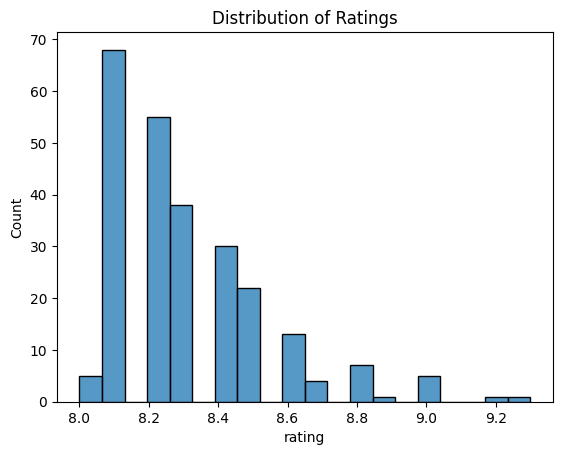

In [6]:
sns.histplot(df['rating'], bins=20)
plt.title('Distribution of Ratings')
plt.show()

**Certificate Variable**

In [7]:
print('Jumlah data: ', len(df.certificate.unique()))
print('Jenis certificate: ', df.certificate.unique())

Jumlah data:  15
Jenis certificate:  ['R' 'PG-13' 'Approved' 'PG' '18+' 'Not Rated' 'G' 'Passed'
 'Not Available' 'TV-PG' 'Unrated' 'X' '13+' 'TV-MA' 'GP']


**Year Variable**

In [8]:
print('Jumlah data: ', len(df.year.unique()))
print('Jenis tahun: ', df.year.unique())

Jumlah data:  86
Jenis tahun:  [1994 1972 2008 1974 1957 1993 2003 2001 1966 1999 2002 2010 1980 1990
 1975 1995 1954 1946 1991 1998 2014 1997 1977 1985 1960 2019 2000 2006
 1942 1988 1962 2011 1936 1968 1979 1931 2012 1981 1950 1940 2018 1986
 1964 2009 1984 2017 2016 1952 1963 1983 2004 1992 1941 1959 1958 1971
 1944 1987 2022 2020 1973 1927 1976 1989 1948 2007 1965 2005 1921 2013
 1961 2021 1982 1939 2015 1996 1925 1926 1949 1978 1953 1924 1928 1955
 1967 1934]


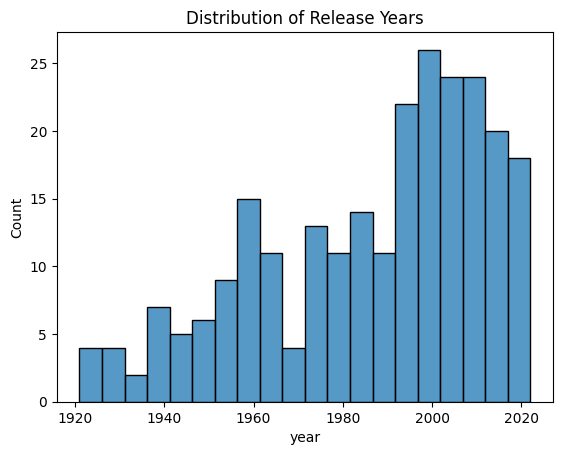

In [9]:
sns.histplot(df['year'], bins=20)
plt.title('Distribution of Release Years')
plt.show()

**Genre Variable**

In [10]:
print('Jumlah data: ', len(df.genre.unique()))
print('Jenis genre: ', df.genre.unique())

Jumlah data:  104
Jenis genre:  ['Drama' 'Crime,Drama' 'Action,Crime,Drama' 'Biography,Drama,History'
 'Action,Adventure,Drama' 'Adventure,Western' 'Drama,Romance'
 'Action,Adventure,Sci-Fi' 'Action,Adventure,Fantasy' 'Action,Sci-Fi'
 'Biography,Crime,Drama' 'Crime,Drama,Mystery' 'Action,Drama'
 'Drama,Family,Fantasy' 'Crime,Drama,Thriller' 'Drama,War'
 'Adventure,Drama,Sci-Fi' 'Comedy,Drama,Romance' 'Crime,Drama,Fantasy'
 'Adventure,Comedy,Sci-Fi' 'Animation,Adventure,Family'
 'Biography,Drama,Music' 'Horror,Mystery,Thriller' 'Drama,Thriller'
 'Animation,Adventure,Drama' 'Drama,Mystery,Sci-Fi' 'Drama,Music'
 'Drama,Romance,War' 'Animation,Drama,War' 'Action,Drama,Mystery'
 'Biography,Comedy,Drama' 'Western' 'Mystery,Thriller' 'Horror,Sci-Fi'
 'Drama,Mystery,War' 'Drama,Western' 'Action,Adventure'
 'Drama,Mystery,Thriller' 'Drama,Film-Noir' 'Drama,Horror'
 'Comedy,Drama,War' 'Animation,Action,Adventure' 'Comedy,War'
 'Adventure,Drama,War' 'Animation,Adventure,Comedy'
 'Animation,Drama,

**Run Time Variable**

In [11]:
print('Jumlah data: ', len(df.run_time.unique()))
print('Jenis run time: ', df.run_time.unique())

Jumlah data:  102
Jenis run time:  ['2h 22m' '2h 55m' '2h 32m' '3h 22m' '1h 36m' '3h 15m' '3h 21m' '2h 34m'
 '2h 58m' '2h 19m' '2h 59m' '2h 28m' '2h 4m' '2h 16m' '2h 25m' '2h 13m'
 '2h 7m' '3h 27m' '2h 10m' '1h 58m' '2h 49m' '1h 56m' '3h 9m' '2h 1m'
 '2h 17m' '2h 5m' '2h 30m' '1h 49m' '2h 12m' '1h 50m' '1h 28m' '2h 35m'
 '1h 59m' '2h 31m' '1h 46m' '1h 42m' '1h 29m' '1h 52m' '1h 27m' '2h 45m'
 '1h 57m' '2h 27m' '1h 53m' '1h 55m' '1h 38m' '2h 26m' '2h 29m' '2h 2m'
 '1h 35m' '2h 44m' '2h' '2h 33m' '2h 40m' '1h 45m' '1h 21m'
 'Not Available' '3h 1m' '2h 14m' '3h 49m' '2h 6m' '2h 50m' '1h 43m'
 '2h 23m' '2h 11m' '1h 48m' '1h 39m' '3h 38m' '2h 8m' '1h 47m' '2h 9m'
 '2h 3m' '1h 54m' '2h 18m' '2h 36m' '2h 41m' '2h 20m' '1h 8m' '1h 37m'
 '3h' '2h 42m' '2h 38m' '2h 15m' '1h 31m' '2h 52m' '1h 51m' '1h 40m'
 '3h 58m' '1h 33m' '1h 26m' '2h 21m' '1h 41m' '3h 32m' '1h 7m' '3h 3m'
 '3h 5m' '45m' '1h 32m' '1h 20m' '1h 23m' '1h 34m' '1h 30m' '3h 11m']


Terdapat isi entri yaitu Not Available yang akan diperbaiki pada data preprocessing

In [12]:
not_available_rows = df[df['run_time'] == 'Not Available']

not_available_rows

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
76,77,The Boat,1981,8.4,"Drama,War",Not Available,Not Available,This is the story of 42 raw recruits caught up...,EM 32000000,11487676,"Jürgen Prochnow,Herbert Grönemeyer,Klaus Wenne...",Wolfgang Petersen,"Wolfgang Petersen,Lothar G. Buchheim"


**Budget Variable**

In [13]:
print('Jumlah data: ', len(df.budget.unique()))
print('Jenis budget: ', df.budget.unique())

Jumlah data:  128
Jenis budget:  ['25000000' '6000000' '185000000' '13000000' '350000' '22000000'
 '94000000' '8000000' '93000000' '1200000' '55000000' '63000000'
 '160000000' '18000000' '3000000' '33000000' '125000000' '3180000'
 '19000000' '$3300000' '70000000' '165000000' '20000000' '60000000'
 '11000000' '102000000' '35000000' '806947' '11400000' 'RF\xa0115000000'
 '45000000' '103000000' '90000000' '40000000' '3300000' '950000' '3700000'
 'Not Available' '9500000' '1500000' '5000000' '1000000' '31500000'
 '9000000' '100000000' '180000000' '2000000' '1752000' '935000'
 '321000000' '18500000' '15000000' '1800000' '250000000' '175000000'
 '30000000' '72000000' 'EM\xa032000000' '356000000' '2400000000'
 '550000000' '2540800' '4500000' '200000000' '32500000' '12000000'
 '839727' '3101000' '2479000' '10000000' '2200000' '927262' '170000000'
 '6800000' '5500000' '500000' 'EM\xa06000000' '1300000' '28000000'
 '48000000' '133000' '95000000' '13500000' '600000' '150000000' '250000'
 '2883848

 * Terdapat berbagai format ada beberapa nilai yang disertai dengan simbol dollar ('$').

In [14]:
not_budgets_rows = df[df['budget'] == '$3300000']

not_budgets_rows

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
22,23,City of God,2002,8.6,"Crime,Drama",R,2h 10m,"If you run, the beast will get you. If you sta...",$3300000,30680793,"Alexandre Rodrigues,Leandro Firmino,Matheus Na...","Fernando Meirelles,Kátia Lund(co-director)","Paulo Lins,Bráulio Mantovani"


In [15]:
not_budgets_rows = df[df['budget'] == '$8240000']

not_budgets_rows

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
199,200,Mary and Max,2009,8.1,"Animation,Comedy,Drama",Not Rated,1h 32m,Two unlikely people. Two different worlds come...,$8240000,1740429,"Toni Collette,Philip Seymour Hoffman,Eric Bana...",Adam Elliot,Adam Elliot


# Data Preprocessing

In [16]:
df.isna().sum()

rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64

Dari output di atas, terlihat bahwa tidak ada missing value

**Certificate Variable**:
Menggabungkan 'Not Rated' dan 'Unrated' menjadi satu kategori, mengganti 'Not Available' dengan 'Unknown', dan mengganti 'Passed' dengan 'Approved' agar lebih mudah diinterpretasi saat analisis.

In [17]:
df['certificate'] = df['certificate'].replace({
    'Not Rated': 'Unrated',
    'Passed': 'Approved',
    'Not Available': 'Unknown'
})

In [18]:
print('Jenis certificate: ', df.certificate.unique())

Jenis certificate:  ['R' 'PG-13' 'Approved' 'PG' '18+' 'Unrated' 'G' 'Unknown' 'TV-PG' 'X'
 '13+' 'TV-MA' 'GP']


**Run Time Variable**: Terlihat bahwa terdapat film The Boat run time yang berisi not available, maka akan diganti sesuai run time film yaitu 2 Jam 29 Menit

In [19]:
df.loc[df['name'] == 'The Boat', 'run_time'] = '2h 29m'

In [20]:
df[df['name'] == 'The Boat']

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
76,77,The Boat,1981,8.4,"Drama,War",Unknown,2h 29m,This is the story of 42 raw recruits caught up...,EM 32000000,11487676,"Jürgen Prochnow,Herbert Grönemeyer,Klaus Wenne...",Wolfgang Petersen,"Wolfgang Petersen,Lothar G. Buchheim"


**Budget Variable**: Menghapus simbol '$'

In [21]:
df.loc[df['name'] == 'City of God', 'budget'] = '3300000'

In [22]:
df[df['name'] == 'City of God']

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
22,23,City of God,2002,8.6,"Crime,Drama",R,2h 10m,"If you run, the beast will get you. If you sta...",3300000,30680793,"Alexandre Rodrigues,Leandro Firmino,Matheus Na...","Fernando Meirelles,Kátia Lund(co-director)","Paulo Lins,Bráulio Mantovani"


In [23]:
df.loc[df['name'] == 'Mary and Max', 'budget'] = '8240000'

In [24]:
df[df['name'] == 'Mary and Max']

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
199,200,Mary and Max,2009,8.1,"Animation,Comedy,Drama",Unrated,1h 32m,Two unlikely people. Two different worlds come...,8240000,1740429,"Toni Collette,Philip Seymour Hoffman,Eric Bana...",Adam Elliot,Adam Elliot


# Data Preparation

Melihat informasi pada file df

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


Melihat statistik deskriptif dengan semua variable

In [26]:
df.describe(include="all")

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
count,250.000000,250,250.000000,250.000000,250,250,250,250,250,250,250,250,250
unique,NaN,250,NaN,NaN,104,13,101,250,127,221,250,160,233
top,NaN,The Shawshank Redemption,NaN,NaN,Drama,R,2h 10m,Fear can hold you prisoner. Hope can set you f...,Not Available,Not Available,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Martin Scorsese,Charles Chaplin
freq,NaN,1,NaN,NaN,19,97,9,1,39,30,1,7,4
mean,125.500000,NaN,1986.360000,8.307200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,72.312977,NaN,25.125356,0.229081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1921.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,63.250000,NaN,1966.250000,8.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,125.500000,NaN,1994.000000,8.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,187.750000,NaN,2006.000000,8.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Model Development dengan Content Based Filtering

cek lagi data yang dimiliki

In [27]:
data = df
data.sample(3)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
49,50,Cinema Paradiso,1988,8.5,"Drama,Romance",PG,2h 35m,"A celebration of youth, friendship, and the ev...",5000000,13019063,"Philippe Noiret,Enzo Cannavale,Antonella Attil...",Giuseppe Tornatore,"Giuseppe Tornatore,Vanna Paoli"
84,85,Requiem for a Dream,2000,8.3,Drama,Unrated,1h 42m,From the director of [Pi],4500000,7390108,"Ellen Burstyn,Jared Leto,Jennifer Connelly,Mar...",Darren Aronofsky,"Hubert Selby Jr.,Darren Aronofsky"
225,226,The Exorcist,1973,8.1,Horror,R,2h 2m,The movie you've been waiting for...without th...,11000000,441306145,"Ellen Burstyn,Max von Sydow,Linda Blair,Lee J....",William Friedkin,William Peter Blatty


akan membangun sistem rekomendasi sederhana berdasarkan jenis genre yang disediakan dalam film tersebut

## TF-IDF Vectorizer

menggunakan fungsi tfidfvectorizer() dari library sklearn

In [28]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(data['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'drama', 'family', 'fantasy', 'fi', 'film', 'history', 'horror',
       'music', 'musical', 'mystery', 'noir', 'romance', 'sci', 'sport',
       'thriller', 'war', 'western'], dtype=object)

melakukan fit dan transformasi ke dalam bentuk matriks

In [29]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(250, 23)

matriks yang kita miliki berukuran (250, 23). Nilai 250 merupakan ukuran data dan 23 merupakan matrik kategori genre.

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, menggunakan fungsi todense()

In [30]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.66615253, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.48974074, 0.67894141, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.46125926, 0.        , ..., 0.        , 0.        ,
         0.84932564]])

lihat matriks tf-idf untuk beberapa nama film (name) dan kategori genre (genre).

In [31]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis genre
# Baris diisi dengan nama film

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.name
).sample(23, axis=1).sample(10, axis=0)

,sci,biography,mystery,adventure,music,fantasy,history,war,fi,action,...,family,comedy,animation,drama,thriller,film,western,noir,sport,crime
name,,,,,,,,,,,,,,,,,,,,,
The Terminator,0.625591,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.625591,0.466125,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000
The Incredibles,0.000000,0.000000,0.000000,0.495334,0.0,0.000000,0.0,0.000000,0.000000,0.532065,...,0.000000,0.0,0.686696,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000
Incendies,0.000000,0.000000,0.915602,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.402085,0.000000,0.0,0.0,0.0,0.000000,0.0000
Amores Perros,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.398615,0.917118,0.0,0.0,0.0,0.000000,0.0000
The Sound of Music,0.000000,0.604966,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.752543,0.0,0.000000,0.260182,0.000000,0.0,0.0,0.0,0.000000,0.0000
Into the Wild,0.000000,0.749056,0.000000,0.578907,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.322151,0.000000,0.0,0.0,0.0,0.000000,0.0000
Taxi Driver,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.462729,0.000000,0.0,0.0,0.0,0.000000,0.8865
Casablanca,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.680236,0.000000,0.000000,...,0.000000,0.0,0.000000,0.273052,0.000000,0.0,0.0,0.0,0.000000,0.0000
Star Wars: Episode VI - Return of the Jedi,0.000000,0.000000,0.000000,0.463574,0.0,0.732902,0.0,0.000000,0.000000,0.497950,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000


## Cosine Similarity

menghitung derajat kesamaan (similarity degree) antar film dengan teknik cosine similarity

In [32]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.46272942, 0.34511079, ..., 0.        , 0.25123808,
        0.2566824 ],
       [0.46272942, 1.        , 0.74581553, ..., 0.        , 0.11625525,
        0.1187745 ],
       [0.34511079, 0.74581553, 1.        , ..., 0.        , 0.08670497,
        0.08858386],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.22589745],
       [0.25123808, 0.11625525, 0.08670497, ..., 0.        , 1.        ,
        0.06448839],
       [0.2566824 , 0.1187745 , 0.08858386, ..., 0.22589745, 0.06448839,
        1.        ]])

melihat matriks kesamaan setiap film dengan menampilkan nama film dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0).

In [33]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama film
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['name'], columns=data['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (250, 250)


name,Gone Girl,Fight Club,Dersu Uzala,The Great Escape,3 Idiots
name,,,,,
Aliens,0.000000,0.000000,0.230452,0.193512,0.000000
The Green Mile,0.082687,0.280147,0.090250,0.075783,0.124933
The Godfather,0.136577,0.462729,0.149069,0.125174,0.206357
The Wizard of Oz,0.000000,0.000000,0.234582,0.196980,0.000000
Jaws,0.535186,0.000000,0.356343,0.299223,0.000000
How to Train Your Dragon,0.000000,0.000000,0.286753,0.240788,0.000000
Life Is Beautiful,0.088059,0.298348,0.096113,0.080707,0.669008
Sherlock Jr.,0.000000,0.000000,0.000000,0.000000,0.480794
Fight Club,0.295155,1.000000,0.322151,0.270512,0.445956


## Mendapatkan Rekomendasi

Di sini, membuat fungsi film_recommendations dengan beberapa parameter sebagai berikut:

* Nama_film : Nama film.
* Similarity_data : Dataframe mengenai similarity yang telah didefinisikan sebelumnya.
* Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘name’ dan ‘genre’.
* k : Banyak rekomendasi yang ingin diberikan.

In [34]:
def film_recommendations(nama_film, similarity_data=cosine_sim_df, items=data[['name', 'genre']], k=5):
    """
    Rekomendasi film berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_film : tipe data string (str)
                Nama film (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan film sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---

    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:, nama_film].to_numpy().argpartition(range(-1, -k-1, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_film agar nama film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_film, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

menerapkan kode di atas untuk menemukan rekomendasi film yang mirip dengan film 'the dark knight'

In [35]:
data[data.name.eq('The Dark Knight')]

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"


mendapatkan film recommendation dengan memanggil fungsi yang telah didefinisikan sebelumnya

In [36]:
# Mendapatkan rekomendasi film yang mirip dengan nama film tersebut
film_recommendations('The Dark Knight')

,name,genre
0,Léon: The Professional,"Action,Crime,Drama"
1,Heat,"Action,Crime,Drama"
2,Batman Begins,"Action,Crime,Drama"
3,Kill Bill: Vol. 1,"Action,Crime,Drama"
4,"Lock, Stock and Two Smoking Barrels","Action,Comedy,Crime"


# Model evaluations

Menilai kinerja model rekomendasi menggunakan metrik evaluasi

menghitung seberapa banyak genre dari rekomendasi yang beneran sama dengan genre asli film yang direkomendasiin

In [37]:
def evaluate_recommendations(recommendations, actual_genre):
    matches = recommendations['genre'].apply(lambda x: actual_genre in x)
    precision = matches.sum() / len(matches)
    return precision

memanggil film_recommendations buat dapetin rekomendasi film mirip 'The Dark Knight' dan ambil genre asli dari 'The Dark Knight'

In [38]:
recs = film_recommendations('The Dark Knight')
actual_genre = df[df['name'] == 'The Dark Knight']['genre'].values[0]

menghitung precision dengan munakan fungsi evaluasi buat hitung seberapa akurat rekomendasi kita

In [39]:
precision = evaluate_recommendations(recs, actual_genre)
print(f'Precision: {precision:.2f}')

Precision: 0.80


Precision 0.80: Dari 5 film yang direkomendasiin, 4 film genrenya cocok sama genre 'The Dark Knight' yaitu Action, Crime, dan Drama.